In [1]:
#Importacao de Bibliotecas

# suprimir os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

!pip install -q scikit-plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Definicao do Dataset

dataset = pd.read_csv('/content/drive/MyDrive/Arquivos_Doutorado/Trabalhos_Disciplinas/Machine Learning - Gustavo/dataset.csv', sep=';')

dataset = pd.get_dummies(dataset,drop_first=True)
X = dataset.iloc[:,0:18]
y = dataset.iloc[:,18:19] #classe tentousuicídio (não ou sim)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9732    0.9909    0.9820       220
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.9646       226
   macro avg     0.4866    0.4955    0.4910       226
weighted avg     0.9474    0.9646    0.9559       226

Acurácia: 0.9646

AUC: 0.4955



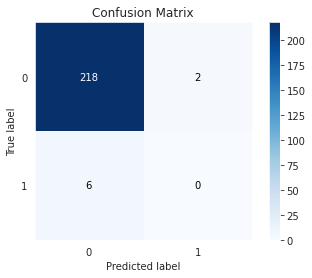

In [4]:
# ----------------- Regressao Logistica (sem balanceamento) ---------------------#

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=True)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# instanciar e treinar um modelo de Regressão Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# fazer as previsões em cima dos dados de teste
y_pred = model.predict(X_test)

# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

#from sklearn.metrics import confusion_matrix
#cmlog = confusion_matrix(y_test, y_pred)
#cmlog

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

#accuracy = (cmlog[0,0]+cmlog[1,1])/cmlog.sum()
#accuracy

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))


0    877
1     25
Name: tentousuicídio, dtype: int64

Tentativas representam 2.7716% do dataset.



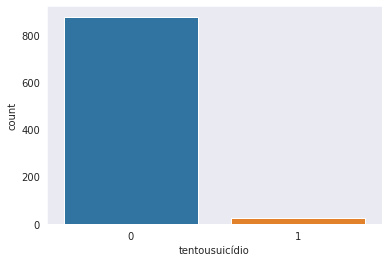

In [5]:
# ------------------ Verificar como esta o balanceamento das classes -------------------#

# importar os dados para um dataframe
df = pd.read_csv('/content/drive/MyDrive/Arquivos_Doutorado/Trabalhos_Disciplinas/Machine Learning - Gustavo/dataset.csv', sep=';')

# ver o balanceamento das classes
print(df.tentousuicídio.value_counts())
#print(df.Class.value_counts())
print("\nTentativas representam {:.4f}% do dataset.\n".format((df[df.tentousuicídio == 1].shape[0] / df.shape[0]) * 100))

# plotar gráfico de barras para as Classes
sns.countplot('tentousuicídio', data=df);

In [6]:
# -------------- Realizar o balanceamento das classes com a técnica under-sampling -------------- #
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9091    0.9524       220
           1     0.2308    1.0000    0.3750         6

    accuracy                         0.9115       226
   macro avg     0.6154    0.9545    0.6637       226
weighted avg     0.9796    0.9115    0.9371       226

Acurácia: 0.9115

AUC: 0.9545



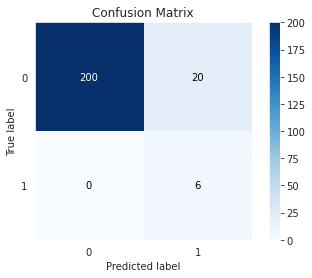

In [ ]:
# ----------------- Instanciar e Treinar um modelo de Regressão Logística (com balanceamento) ---------------------#
model_res = LogisticRegression()
model_res.fit(X_res, y_res)

# fazer as previsões em cima dos dados de teste
y_pred_res = model_res.predict(X_test)

# Matrix de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_res, normalize=False)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_res, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_res)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_res)))

In [ ]:
# ------------------------- SVM (sem balanceamento) ---------------------------#
from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'rbf', random_state = 0)
svmclassifier.fit(X_train, np.ravel(y_train, order='C'))

y_pred_svm = svmclassifier.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9735    1.0000    0.9865       220
           1     0.0000    0.0000    0.0000         6

    accuracy                         0.9735       226
   macro avg     0.4867    0.5000    0.4933       226
weighted avg     0.9476    0.9735    0.9604       226

Acurácia: 0.9735

AUC: 0.5000



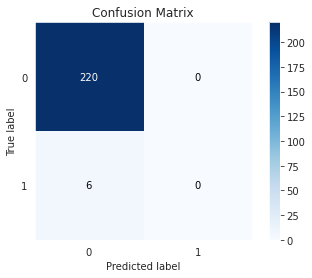

In [ ]:
# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, normalize=False)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_svm)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_svm)))

In [7]:
# ------------------------- SVM (com balanceamento) ---------------------------#

# Realiza o balanceamento
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

from sklearn.svm import SVC
svmclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svmclassifier.fit(X_res, np.ravel(y_res, order='C'))

y_pred_svm = svmclassifier.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9952    0.9364    0.9649       220
           1     0.2632    0.8333    0.4000         6

    accuracy                         0.9336       226
   macro avg     0.6292    0.8848    0.6824       226
weighted avg     0.9757    0.9336    0.9499       226

Acurácia: 0.9336

AUC: 0.8848



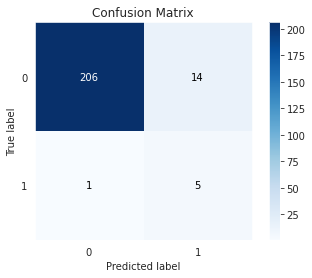

In [8]:
# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, normalize=False)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_svm, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred_svm)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred_svm)))

In [ ]:
# -------------------- REDE NEURAL (sem balanceamento) -----------------------#

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Arquivos_Doutorado/Trabalhos_Disciplinas/Machine Learning - Gustavo/dataset.csv', sep=';')
dataset = pd.get_dummies(dataset,drop_first=True)
X = dataset.iloc[:,0:18]
y = dataset.iloc[:,18:19]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling, é necessário para manter o as variáveis no mesmo range 
#e não fazer com que alguma variável sobreponha as outras
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Primeira Camada: Entrada
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Segunda Camada: hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Terceira Camada: output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the ANN
# O parâmetro "optimizer" refere-se ao algoritmo para otimizar os pesos. O algoritmo Adam 
# é um algoritimo Gradient Discent Estocático
# loss é o erro que se quer minimizar, logaric miss loss é usado quando a camada de saída é a sigmoid
# metrics é usado para mostrar a evolução da métrica escolhida durante o treinamento
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


# Fitting the ANN to the Training set

# batch_size é o número de observações que será usada para altualizar os pesos
# O batch_size é um hiperparâmetro de gradiente descendente que controla o número de amostras de treinamento 
# a serem trabalhadas antes que os parâmetros internos do modelo sejam atualizados.
# O Epochs é um hiperparâmetro do gradiente descendente que controla o número de passagens completas pelo 
#conjunto de dados de treinamento.

classifier.fit(X_train, y_train, epochs=100,batch_size = 10)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# transformar em true or false para usar na confusion matrix
y_pred = (y_pred > 0.5)
len(y_pred)


Epoch 1/100
68/68 [==============================] - 1s 2ms/step - loss: 0.6830 - accuracy: 0.9104
Epoch 2/100
68/68 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.9827
Epoch 3/100
68/68 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.9768
Epoch 4/100
68/68 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9699
Epoch 5/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9808
Epoch 6/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9722
Epoch 7/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9726
Epoch 8/100
68/68 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.9742
Epoch 9/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0554 - accuracy: 0.9761
Epoch 10/100
68/68 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9675
Epoch 11/

226

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9733    1.0000    0.9865       219
           1     1.0000    0.1429    0.2500         7

    accuracy                         0.9735       226
   macro avg     0.9867    0.5714    0.6182       226
weighted avg     0.9742    0.9735    0.9637       226

Acurácia: 0.9735

AUC: 0.5714



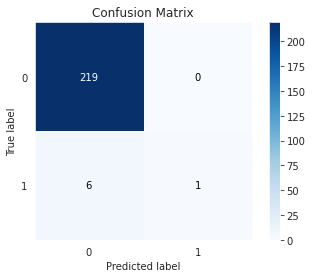

In [ ]:
# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

In [ ]:
# -------------------- REDE NEURAL (com balanceamento) -----------------------#

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Arquivos_Doutorado/Trabalhos_Disciplinas/Machine Learning - Gustavo/dataset.csv', sep=';')
dataset = pd.get_dummies(dataset,drop_first=True)
X = dataset.iloc[:,0:18]
y = dataset.iloc[:,18:19]

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling, é necessário para manter o as variáveis no mesmo range 
#e não fazer com que alguma variável sobreponha as outras
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Primeira Camada: Entrada
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Segunda Camada: hidden layer
classifier.add(Dense(units = 11, kernel_initializer = 'uniform', activation = 'relu'))

# Terceira Camada: output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


# Compiling the ANN
# O parâmetro "optimizer" refere-se ao algoritmo para otimizar os pesos. O algoritmo Adam 
# é um algoritimo Gradient Discent Estocático
# loss é o erro que se quer minimizar, logaric miss loss é usado quando a camada de saída é a sigmoid
# metrics é usado para mostrar a evolução da métrica escolhida durante o treinamento
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Realiza o balanceamento
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# Fitting the ANN to the Training set

# batch_size é o número de observações que será usada para altualizar os pesos
# O batch_size é um hiperparâmetro de gradiente descendente que controla o número de amostras de treinamento 
# a serem trabalhadas antes que os parâmetros internos do modelo sejam atualizados.
# O Epochs é um hiperparâmetro do gradiente descendente que controla o número de passagens completas pelo 
#conjunto de dados de treinamento.

classifier.fit(X_res, y_res, epochs=100,batch_size = 10)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# transformar em true or false para usar na confusion matrix
y_pred = (y_pred > 0.5)
len(y_pred)


Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.5022
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5211
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.6722
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.8478
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.9444
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.9711
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.9611
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.9711
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.9544
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6874 - accuracy: 0.9244
Epoch 11/100
4/4 [===========

226

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.8493    0.9185       219
           1     0.1750    1.0000    0.2979         7

    accuracy                         0.8540       226
   macro avg     0.5875    0.9247    0.6082       226
weighted avg     0.9744    0.8540    0.8993       226

Acurácia: 0.8540

AUC: 0.9247



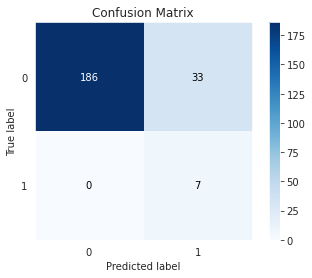

In [ ]:
# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))